In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
advertising = pd.read_csv('https://raw.githubusercontent.com/ashmanmalhotra/Data-Analysis-Project-Assignment/main/07%20Future%20Sales%20Analysis/data.csv')
advertising.head(5)

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.tail(5)

,Index,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
advertising.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
%matplotlib inline

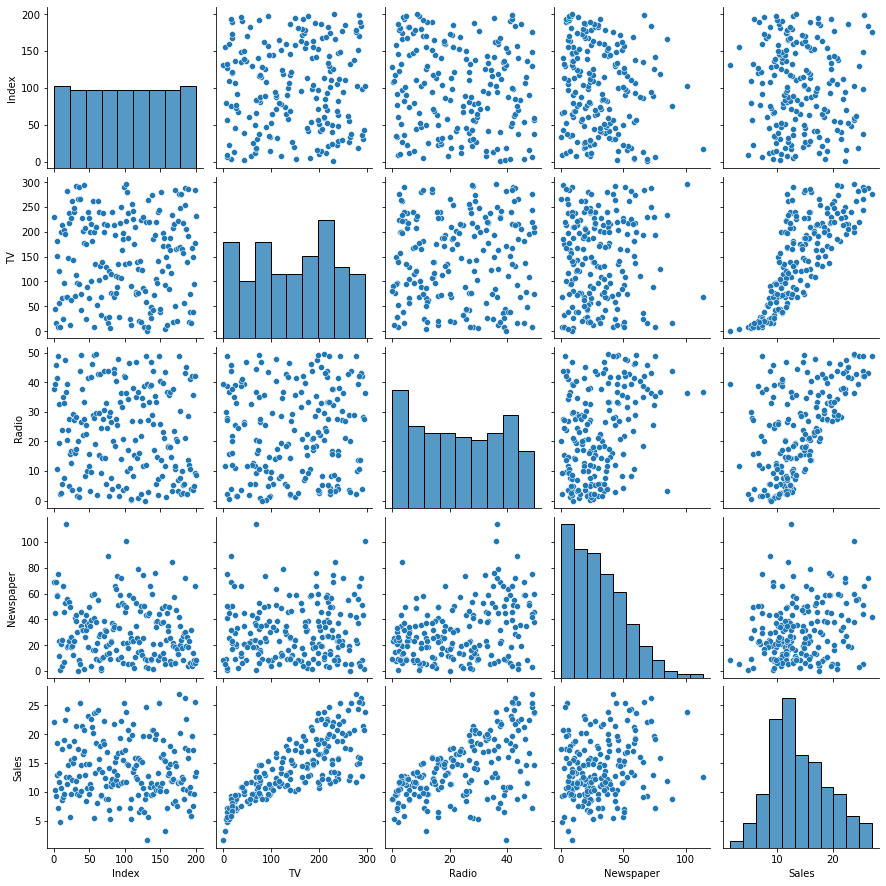

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(advertising)

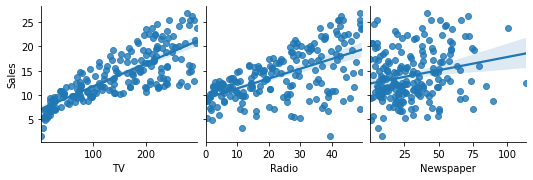

In [9]:
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',aspect=1, kind='reg')

In [10]:
X = advertising[['TV','Radio','Newspaper']]
Y = advertising['Sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [13]:
print(model.coef_)
print(model.intercept_)

[0.0454256  0.18975773 0.00460308]
2.652789668879496


# Model Evaluation

In [14]:
model_coef = pd.DataFrame(model.coef_,X_test.columns,columns=['Coeffiecients'])
model_coef

,Coeffiecients
TV,0.045426
Radio,0.189758
Newspaper,0.004603


Above result says if TV price increase by 1 unit it will affect the sales by 0.045426 units

In [15]:
Y_pred = model.predict(X_test)

Calculating Error

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
r_squared = r2_score(Y_test,Y_pred)
print('Mean squared', mse)
print('Predict square',r_squared)

Mean squared 1.8506819941636945
Predict square 0.9058622107532246


In [17]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
model_l = sm.OLS(Y_train,X_train_sm).fit()
model_l.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [18]:
print(model_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           9.97e-66
Time:                        11:55:51   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

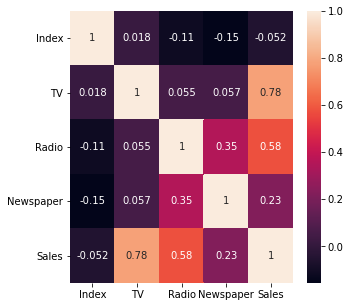

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising.corr(),annot = True)

In [21]:
# Removing Newspaper
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]
model.fit(X_train_new,Y_train)

LinearRegression()

In [22]:
Y_pred_new = model.predict(X_test_new)

Text(0, 0.5, 'Sales')

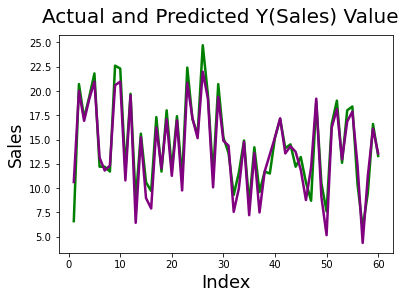

In [23]:
# Actual Sales value VS Predicted Sales
C = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(C,Y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(C,Y_pred, color="purple", linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted Y(Sales) Value', fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=17)